In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

# **Preprocess the data**

In [ ]:
# Load Dataset - it is already splitted
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# Normalize
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Encode Labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
# transformation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(x_train)

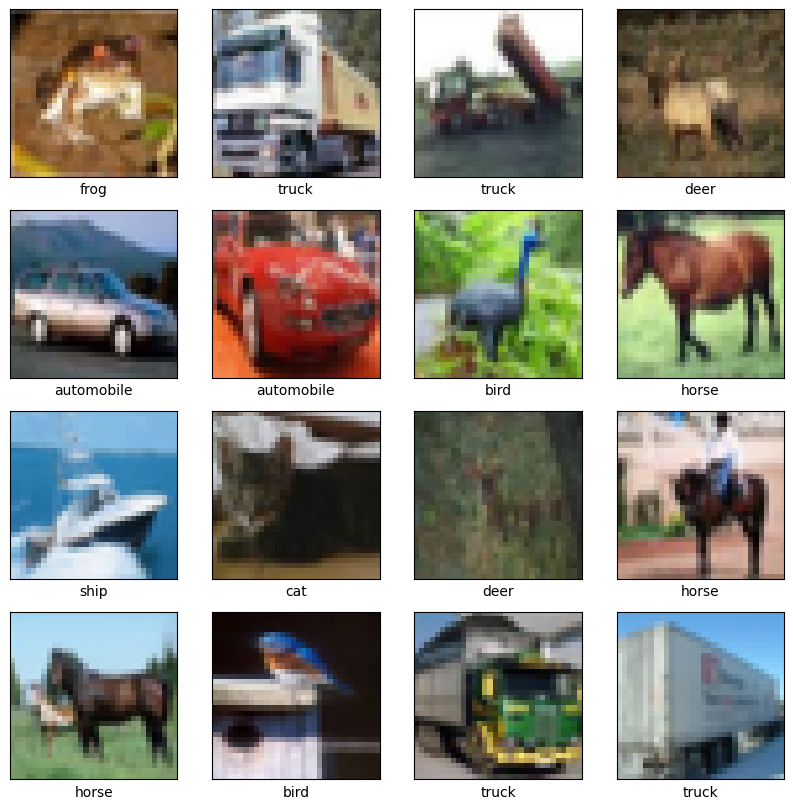

In [ ]:
# Visualize some samples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i].argmax()])
plt.show()

# **Build your CNN model**
In this notebook, we will bulit a CNN model inspired by ResNet, to suit this problem the model will be smaller and the input will be is 32x32 image.

In [ ]:
# Built the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience= 10, restore_best_weights=True)

history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=50,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Accuracy on the test set: {accuracy * 100: .4f}%')
print(f'Loss on the test set: {loss:. 4f}')

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 194ms/step - accuracy: 0.7023 - loss: 0.8518 - val_accuracy: 0.7339 - val_loss: 0.7698
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 191ms/step - accuracy: 0.7143 - loss: 0.8198 - val_accuracy: 0.7391 - val_loss: 0.7450
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 150s 191ms/step - accuracy: 0.7232 - loss: 0.7902 - val_accuracy: 0.7476 - val_loss: 0.7256
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 190ms/step - accuracy: 0.7309 - loss: 0.7923 - val_accuracy: 0.7415 - val_loss: 0.7417
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 149s 191ms/step - accuracy: 0.7356 - loss: 0.7708 - val_accuracy: 0.7520 - val_loss: 0.7391
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 152s 195ms/step - accuracy: 0.7359 - loss: 0.7563 - val_accuracy: 0.7618 - val_loss: 0.7074
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 154s 197ms/step - accuracy: 0.7474 - loss: 0.7386 - val_accuracy: 0.7685 - val_loss: 0.6674
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 153s 195ms/step - accuracy: 0.7412 -

ValueError: Format specifier missing precision

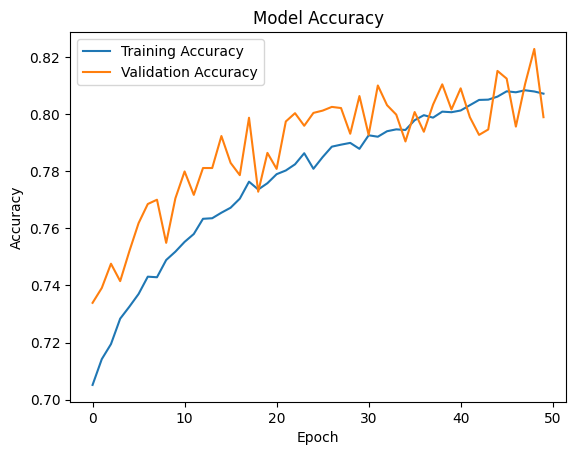

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

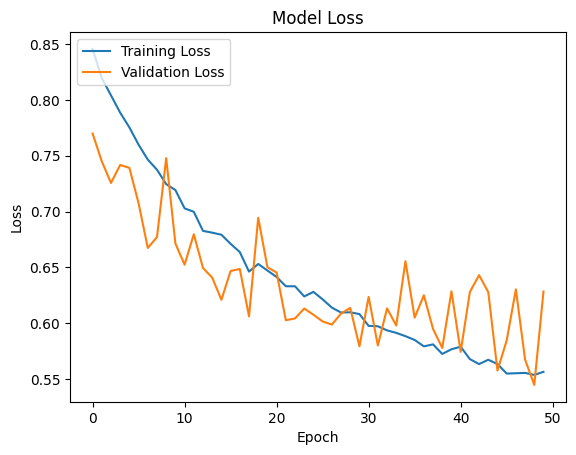

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


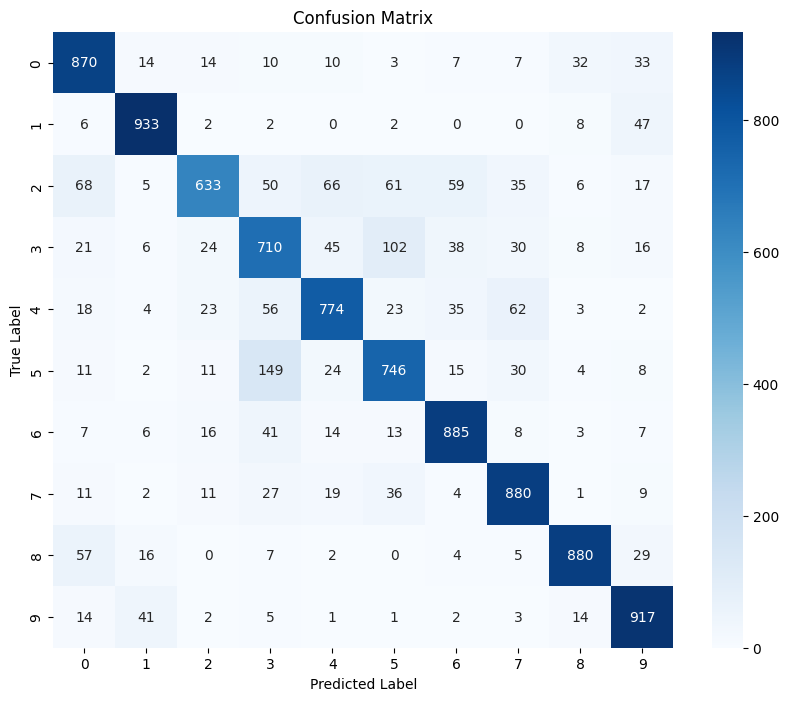

In [ ]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      1000
           1       0.91      0.93      0.92      1000
           2       0.86      0.63      0.73      1000
           3       0.67      0.71      0.69      1000
           4       0.81      0.77      0.79      1000
           5       0.76      0.75      0.75      1000
           6       0.84      0.89      0.86      1000
           7       0.83      0.88      0.85      1000
           8       0.92      0.88      0.90      1000
           9       0.85      0.92      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



In [ ]:
model.save('cifar10_cnn_model.h5')